In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

#----------------------------------------------------------------------
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------
def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag
#----------------------------------------------------------------------

In [2]:
#----------------------------------------------------------------------
##  MAIN PART OF THE CODE
#----------------------------------------------------------------------

## change the parameter below if you want to simulate a smaller system
nt      = 512        # number of temperature points
N       = 16         # size of the lattice, N x N
eqSteps = 2000       # number of MC sweeps for equilibration
mcSteps = 2000       # number of MC sweeps for calculation

T              = np.linspace(1, 4, nt)        #temperature
Energy         = np.zeros(nt)
Magnetization  = np.zeros(nt)
SpecificHeat   = np.zeros(nt)
Susceptibility = np.zeros(nt)

for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    
    for i in range(eqSteps):
        mcmove(config, 1.0/T[m])

    for i in range(mcSteps):
        mcmove(config, 1.0/T[m])        # monte carlo moves
        Ene = calcEnergy(config)        # calculate the energy
        Mag = calcMag(config)           # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2   + Mag*Mag ;
        E2 = E2   + Ene*Ene;

        Energy[m]         = E1/(mcSteps*N*N)
        Magnetization[m]  = M1/(mcSteps*N*N)
        SpecificHeat[m]   = ( E2/mcSteps - E1*E1/(mcSteps*mcSteps) )/(N*T[m]*T[m]);
        Susceptibility[m] = ( M2/mcSteps - M1*M1/(mcSteps*mcSteps) )/(N*T[m]);
#----------------------------------------------------------------------

C:\Users\achri\Anaconda3\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning: overflow encountered in long_scalars


KeyboardInterrupt: 

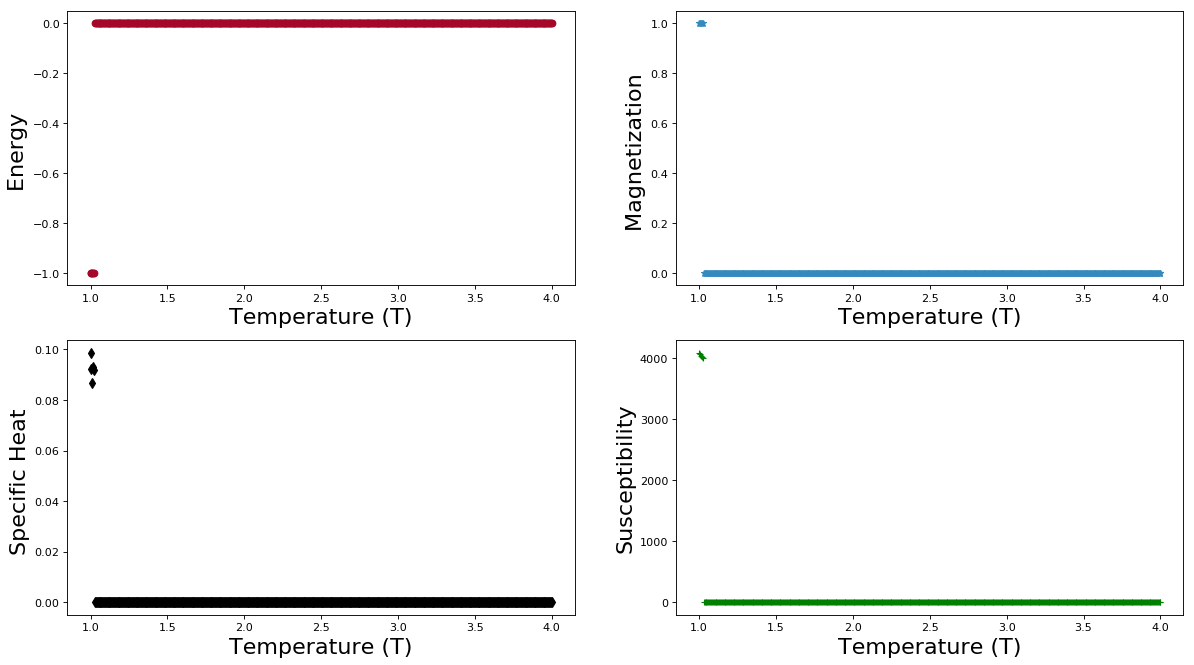

In [3]:
#----------------------------------------------------------------------     
# Plot the Energy, Magnetization, Specific Heat and Susceptibility
#----------------------------------------------------------------------
f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');    

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, Energy, 'o', color="#A60628", label=' Energy');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), '*', color="#348ABD", label='Magnetization');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);


sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, SpecificHeat, 'd', color="black", label='Specific Heat');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);


sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, Susceptibility, '+', color="green", label='Specific Heat');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);
plt.show()
#plt.legend(loc='best', fontsize=15); 
#----------------------------------------------------------------------